#  &#9992;</span><span style="color:#1F618D;font-size:40px;font-weight:bold;font-family:Arial;"> Flight Price Prediction</span>  <span style="color:#7F8C8D;font-size:36px;font-style:italic;">- EDA + Feature Engineering</span>
&#9992; <span style="color:#2E86C1;font-size:24px;font-weight:bold;font-family:Arial;">Akash Patil</span>
<br>&#9992; aakashgolu1008@gmail.com

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\Guru\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Guru\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\Guru\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df_train=pd.read_excel('Data_Train.xlsx')
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
df_test=pd.read_excel('Test_set.xlsx')
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [4]:
final_df=df_train.append(df_test)

C:\Users\Guru\AppData\Local\Temp\ipykernel_6744\2658744110.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=df_train.append(df_test)


In [5]:
final_df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info,NaN


In [6]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.2+ MB


In [7]:
final_df.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
dtype: int64

In [8]:
## feature engineer process
final_df['Date']=final_df["Date_of_Journey"].str.split('/').str[0]
final_df['Month']=final_df["Date_of_Journey"].str.split('/').str[1]
final_df['Year']=final_df["Date_of_Journey"].str.split('/').str[2]

In [9]:
# another method 
# df["Date"]=df['Date_of_Journey'].apply(lambda x:x.split("/")[0])
# df["Month"]=df['Date_of_Journey'].apply(lambda x:x.split("/")[1])
# df["Year"]=df['Date_of_Journey'].apply(lambda x:x.split("/")[2])

In [10]:
# Data type converting into int
final_df['Date']=final_df['Date'].astype(int)
final_df['Month']=final_df['Month'].astype(int)
final_df['Year']=final_df['Year'].astype(int)

In [11]:
final_df.drop('Date_of_Journey',axis=1,inplace=True)

In [12]:
final_df.head(1)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019


In [13]:
#final_df['Arrival_Time']=final_df["Arrival_Time"].apply(lambda x: x.split(' ')[0]) 
final_df['Arrival_Time']=final_df['Arrival_Time'].str.split(' ').str[0]

In [14]:
final_df["Arrival_Hour"]=final_df['Arrival_Time'].apply(lambda x:x.split(':')[0])
final_df["Arrival_min"]=final_df['Arrival_Time'].apply(lambda x:x.split(':')[1])

In [15]:
final_df.head(1)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019,01,10


In [16]:
final_df['Arrival_Hour']=final_df['Arrival_Hour'].astype(int)
final_df['Arrival_min']=final_df['Arrival_min'].astype(int)

In [17]:
final_df.dtypes

Airline             object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
Date                 int32
Month                int32
Year                 int32
Arrival_Hour         int32
Arrival_min          int32
dtype: object

In [18]:
final_df.drop('Arrival_Time',axis=1,inplace=True)

In [19]:
final_df.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882.0,9,6,2019,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218.0,12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302.0,1,3,2019,21,35


In [20]:
final_df["Dep_Hour"]=final_df['Dep_Time'].apply(lambda x:x.split(':')[0])
final_df["Dep_min"]=final_df['Dep_Time'].apply(lambda x:x.split(':')[1])
final_df['Dep_Hour']=final_df['Dep_Hour'].astype(int)
final_df['Dep_min']=final_df['Dep_min'].astype(int)
final_df.drop('Dep_Time',axis=1,inplace=True)

In [21]:
final_df.head(1)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_min,Dep_Hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10,22,20


In [22]:
final_df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [23]:
final_df[final_df['Total_Stops'].isnull()]


,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_min,Dep_Hour,Dep_min
9039,Air India,Delhi,Cochin,NaN,23h 40m,NaN,No info,7480.0,6,5,2019,9,25,9,45


In [24]:
final_df[(final_df['Source']=='Delhi') & (final_df['Destination']=='Cochin') & (final_df['Airline']=='Air India')]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_min,Dep_Hour,Dep_min
10,Air India,Delhi,Cochin,DEL → BLR → COK,13h 15m,1 stop,No info,8907.0,1,6,2019,23,0,9,45
15,Air India,Delhi,Cochin,DEL → AMD → BOM → COK,26h 35m,2 stops,No info,14011.0,3,3,2019,19,15,16,40
18,Air India,Delhi,Cochin,DEL → CCU → BOM → COK,23h,2 stops,No info,13381.0,12,6,2019,19,15,20,15
61,Air India,Delhi,Cochin,DEL → MAA → COK,27h 20m,1 stop,No info,5117.0,3,4,2019,9,25,6,5
68,Air India,Delhi,Cochin,DEL → BHO → BOM → COK,13h 20m,2 stops,No info,10861.0,21,5,2019,19,15,5,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2623,Air India,Delhi,Cochin,DEL → BOM → COK,20h 15m,1 stop,No info,NaN,9,4,2019,19,15,23,0
2627,Air India,Delhi,Cochin,DEL → BLR → COK,22h 30m,1 stop,No info,NaN,6,3,2019,8,15,9,45
2643,Air India,Delhi,Cochin,DEL → HYD → MAA → COK,23h 40m,2 stops,No info,NaN,6,6,2019,9,25,9,45
2654,Air India,Delhi,Cochin,DEL → BOM → COK,24h 40m,1 stop,No info,NaN,3,3,2019,7,40,7,0


In [25]:
final_df['Total_Stops']=final_df['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4,'NaN':2})


In [26]:
final_df.drop('Route',axis=1,inplace=True)

In [27]:
final_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_min,Dep_Hour,Dep_min
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,7h 25m,2.0,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,19h,2.0,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,5h 25m,1.0,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,4h 45m,1.0,No info,13302.0,1,3,2019,21,35,16,50


In [28]:
final_df[final_df['Total_Stops'].isnull()]

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_min,Dep_Hour,Dep_min
9039,Air India,Delhi,Cochin,23h 40m,NaN,No info,7480.0,6,5,2019,9,25,9,45


In [29]:
final_df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [30]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Duration         13354 non-null  object 
 4   Total_Stops      13353 non-null  float64
 5   Additional_Info  13354 non-null  object 
 6   Price            10683 non-null  float64
 7   Date             13354 non-null  int32  
 8   Month            13354 non-null  int32  
 9   Year             13354 non-null  int32  
 10  Arrival_Hour     13354 non-null  int32  
 11  Arrival_min      13354 non-null  int32  
 12  Dep_Hour         13354 non-null  int32  
 13  Dep_min          13354 non-null  int32  
dtypes: float64(2), int32(7), object(5)
memory usage: 1.2+ MB


In [38]:
final_df['Duration_hour']=final_df['Duration'].str.split(' ').str[0].str.split('h').str[0]

In [40]:
final_df[final_df['Duration_hour']=='5m']

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_min,Dep_Hour,Dep_min,Duration_hour
6474,Air India,Mumbai,Hyderabad,5m,2.0,No info,17327.0,6,3,2019,16,55,16,50,5m
2660,Air India,Mumbai,Hyderabad,5m,2.0,No info,NaN,12,3,2019,16,55,16,50,5m


In [42]:
final_df.drop([6474,2660],axis=0,inplace=True)

In [43]:
final_df['Duration_hour']=final_df['Duration_hour'].astype(int)

In [44]:
final_df.dtypes

Airline             object
Source              object
Destination         object
Duration            object
Total_Stops        float64
Additional_Info     object
Price              float64
Date                 int32
Month                int32
Year                 int32
Arrival_Hour         int32
Arrival_min          int32
Dep_Hour             int32
Dep_min              int32
Duration_hour        int32
dtype: object

In [53]:
final_df['Duration_min']=final_df['Duration'].str.split(' ').str[1].fillna('0m').str.split('m').str[0]

In [54]:
final_df['Duration_min']=final_df['Duration_min'].astype(int)

In [55]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13351 entries, 0 to 2670
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13351 non-null  object 
 1   Source           13351 non-null  object 
 2   Destination      13351 non-null  object 
 3   Duration         13351 non-null  object 
 4   Total_Stops      13350 non-null  float64
 5   Additional_Info  13351 non-null  object 
 6   Price            10681 non-null  float64
 7   Date             13351 non-null  int32  
 8   Month            13351 non-null  int32  
 9   Year             13351 non-null  int32  
 10  Arrival_Hour     13351 non-null  int32  
 11  Arrival_min      13351 non-null  int32  
 12  Dep_Hour         13351 non-null  int32  
 13  Dep_min          13351 non-null  int32  
 14  Duration_hour    13351 non-null  int32  
 15  Duration_min     13351 non-null  int32  
dtypes: float64(2), int32(9), object(5)
memory usage: 1.3+ MB


In [56]:
final_df.drop('Duration',axis=1,inplace=True)

In [57]:
final_df.head(1)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_min,Dep_Hour,Dep_min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,0.0,No info,3897.0,24,3,2019,1,10,22,20,2,50


In [58]:
final_df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

### We can't use get_dummies because whenever we have a test data we need to transform that test data. We can save this lable encoder in the form of pickle file.

In [59]:
# lable encoder 
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [60]:
#final_df['Airline']=le.fit_transform(final_df['Airline'])
col=['Airline','Source','Destination','Additional_Info']
for i in col:
    final_df[i]=le.fit_transform(final_df[i])
final_df.head(5)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_min,Dep_Hour,Dep_min,Duration_hour,Duration_min
0,3,0,5,0.0,8,3897.0,24,3,2019,1,10,22,20,2,50
1,1,3,0,2.0,8,7662.0,1,5,2019,13,15,5,50,7,25
2,4,2,1,2.0,8,13882.0,9,6,2019,4,25,9,25,19,0
3,3,3,0,1.0,8,6218.0,12,5,2019,23,30,18,5,5,25
4,3,0,5,1.0,8,13302.0,1,3,2019,21,35,16,50,4,45


In [70]:
# we can also do this One hand encoding
pd.get_dummies(final_df,columns=['Airline','Source','Destination','Additional_Info'])

,Total_Stops,Price,Date,Month,Year,Arrival_Hour,Arrival_min,Dep_Hour,Dep_min,Duration_hour,...,Additional_Info_0,Additional_Info_1,Additional_Info_2,Additional_Info_3,Additional_Info_4,Additional_Info_5,Additional_Info_6,Additional_Info_7,Additional_Info_8,Additional_Info_9
0,0.0,3897.0,24,3,2019,1,10,22,20,2,...,0,0,0,0,0,0,0,0,1,0
1,2.0,7662.0,1,5,2019,13,15,5,50,7,...,0,0,0,0,0,0,0,0,1,0
2,2.0,13882.0,9,6,2019,4,25,9,25,19,...,0,0,0,0,0,0,0,0,1,0
3,1.0,6218.0,12,5,2019,23,30,18,5,5,...,0,0,0,0,0,0,0,0,1,0
4,1.0,13302.0,1,3,2019,21,35,16,50,4,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1.0,NaN,6,6,2019,20,25,20,30,23,...,0,0,0,0,0,0,0,0,1,0
2667,0.0,NaN,27,3,2019,16,55,14,20,2,...,0,0,0,0,0,0,0,0,1,0
2668,1.0,NaN,6,3,2019,4,25,21,50,6,...,0,0,0,0,0,0,0,0,1,0
2669,1.0,NaN,6,3,2019,19,15,4,0,15,...,0,0,0,0,0,0,0,0,1,0


In [71]:
final_df

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_min,Dep_Hour,Dep_min,Duration_hour,Duration_min
0,3,0,5,0.0,8,3897.0,24,3,2019,1,10,22,20,2,50
1,1,3,0,2.0,8,7662.0,1,5,2019,13,15,5,50,7,25
2,4,2,1,2.0,8,13882.0,9,6,2019,4,25,9,25,19,0
3,3,3,0,1.0,8,6218.0,12,5,2019,23,30,18,5,5,25
4,3,0,5,1.0,8,13302.0,1,3,2019,21,35,16,50,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,3,0,1.0,8,NaN,6,6,2019,20,25,20,30,23,55
2667,3,3,0,0.0,8,NaN,27,3,2019,16,55,14,20,2,35
2668,4,2,1,1.0,8,NaN,6,3,2019,4,25,21,50,6,35
2669,1,2,1,1.0,8,NaN,6,3,2019,19,15,4,0,15,15


In [73]:
final_df.corr()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_min,Dep_Hour,Dep_min,Duration_hour,Duration_min
Airline,1.000000,-0.018226,0.022335,-0.206106,-0.058448,-0.039321,0.020571,0.028661,NaN,-0.007761,-0.073684,-0.026016,-0.057586,-0.161799,-0.030632
Source,-0.018226,1.000000,-0.590170,0.190794,-0.022355,0.015709,-0.002433,0.181142,NaN,0.020674,0.014586,0.058331,-0.058939,0.163986,-0.144115
Destination,0.022335,-0.590170,1.000000,-0.294544,0.027334,-0.071282,-0.035069,-0.362176,NaN,-0.032713,0.020964,-0.068371,0.132836,-0.256013,0.063413
Total_Stops,-0.206106,0.190794,-0.294544,1.000000,-0.079325,0.603742,-0.010912,0.047180,NaN,0.037108,-0.108859,-0.070804,-0.000563,0.739301,-0.132110
Additional_Info,-0.058448,-0.022355,0.027334,-0.079325,1.000000,-0.065618,-0.018326,-0.043319,NaN,0.022050,0.039831,-0.054907,-0.013470,-0.166334,0.047158
Price,-0.039321,0.015709,-0.071282,0.603742,-0.065618,1.000000,-0.153610,-0.103536,NaN,0.024221,-0.086548,0.006770,-0.024776,0.508929,-0.124552
Date,0.020571,-0.002433,-0.035069,-0.010912,-0.018326,-0.153610,1.000000,-0.035604,NaN,0.001009,-0.014484,-0.002931,-0.008878,-0.022815,-0.003865
Month,0.028661,0.181142,-0.362176,0.047180,-0.043319,-0.103536,-0.035604,1.000000,NaN,-0.003127,-0.109977,0.034687,-0.069180,0.009333,-0.044667
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arrival_Hour,-0.007761,0.020674,-0.032713,0.037108,0.022050,0.024221,0.001009,-0.003127,NaN,1.000000,-0.150772,0.004253,0.043906,0.054657,-0.119485


<AxesSubplot: >

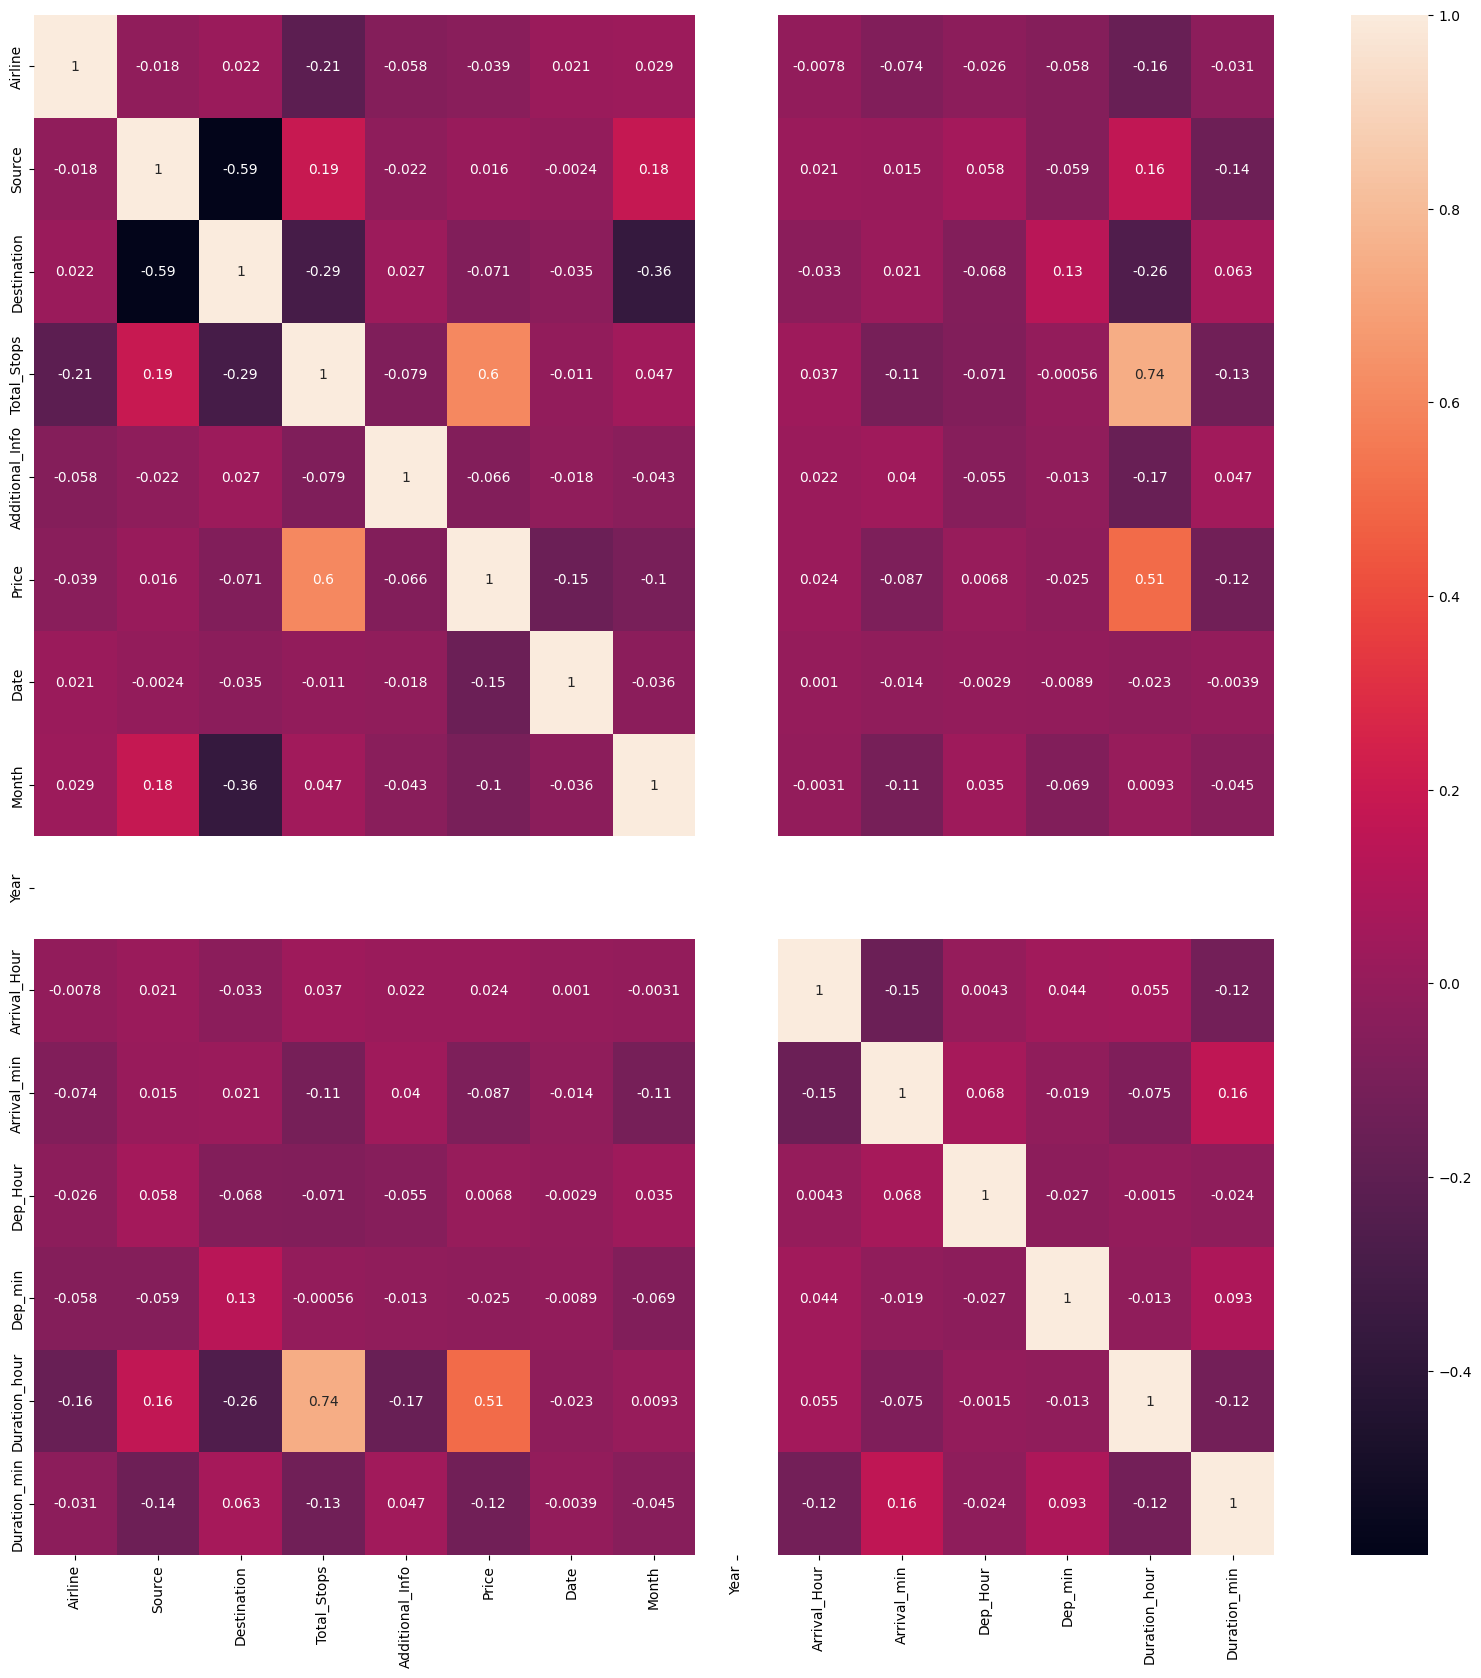

In [79]:
# matplotlib.rcParams(fig(12,6))
plt.figure(figsize=(20,20))
sns.heatmap(final_df.corr(),annot=True)

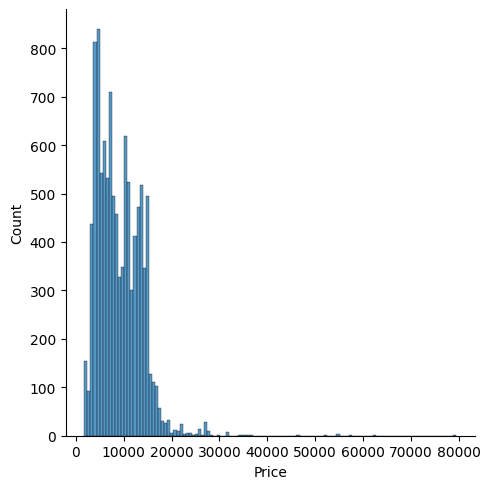

In [82]:
sns.displot(final_df['Price'])